## Assignment-I Dimensionality Reduction

In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2, suppress=True)

### 1. Download any USER- MOVIE dataset of your choice

Here we are using the MovieLens dataset. It is a dataset of movies and ratings given by users. It can be downloaded from [here](https://grouplens.org/datasets/movielens/100k/)

In [3]:
ratings = pd.read_csv('data/ratings.csv')
# data
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))
ratings = ratings[ratings.movieId <= 4000]
ratings

Number of users = 610 | Number of movies = 9724


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
99789,610,3988,2.5,1479544727
99790,610,3994,4.5,1493845907
99791,610,3996,5.0,1493844825
99792,610,3997,1.0,1493846855


Create the ratings matrix of shape (users x movies) from the ratings dataframe. The values of the matrix are the ratings given by the users to the movies. The rows of the matrix are the users and the columns are the movies. The values are the ratings.

In [5]:
Ratings = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
#limit movies to 2000 movies
Ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3990,3991,3992,3993,3994,3996,3997,3998,3999,4000
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalize the ratings matrix (based on mean of each user)

In [6]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)
Ratings_demeaned

array([[ 3.66, -0.34,  3.66, ..., -0.34, -0.34, -0.34],
       [-0.01, -0.01, -0.01, ..., -0.01, -0.01, -0.01],
       [-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02],
       ...,
       [ 1.96,  1.46,  1.46, ..., -0.54, -0.54, -0.54],
       [ 2.96, -0.04, -0.04, ..., -0.04, -0.04, -0.04],
       [ 4.65, -0.35, -0.35, ..., -0.35,  2.65, -0.35]])

### 2. Visualize it using multiple dimensions and say why SVD and PCA should be used here (2)

#### Checking the sparsity of the matrix

The MovieLens dataset is a sparse matrix. The sparsity of the matrix is calculated as the number of missing ratings divided by the total number of ratings. The sparsity of the matrix is **96.75%** which means that 96.75% of the ratings are missing or zeros. This can be confirmed by the density plot of the matrix. The plot shows that the matrix is sparse since the highest density is at zero. This suggests that the matrix is sparse.

The sparcity is the reason why dimensionality reduction techniques are used to reduce the number of features in the matrix. Techniques such as SVD and PCA are used to reduce the number of features in the matrix. This results in a dense matrix with less number of features.

In [7]:
total_elements = np.prod(Ratings.shape)
non_zero_elements = np.count_nonzero(Ratings)
print('Total Elements: ', total_elements)
print('Non Zero Elements: ', non_zero_elements)
sparsity = (total_elements - non_zero_elements) / total_elements * 100
print ('Sparsity: {:4.2f}%'.format(sparsity))

Total Elements:  1820240
Non Zero Elements:  59128
Sparsity: 96.75%


C:\Users\shubham\AppData\Local\Temp\ipykernel_16500\720259986.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ratings_demeaned[Ratings_demeaned != 0].flatten(), bins=20)


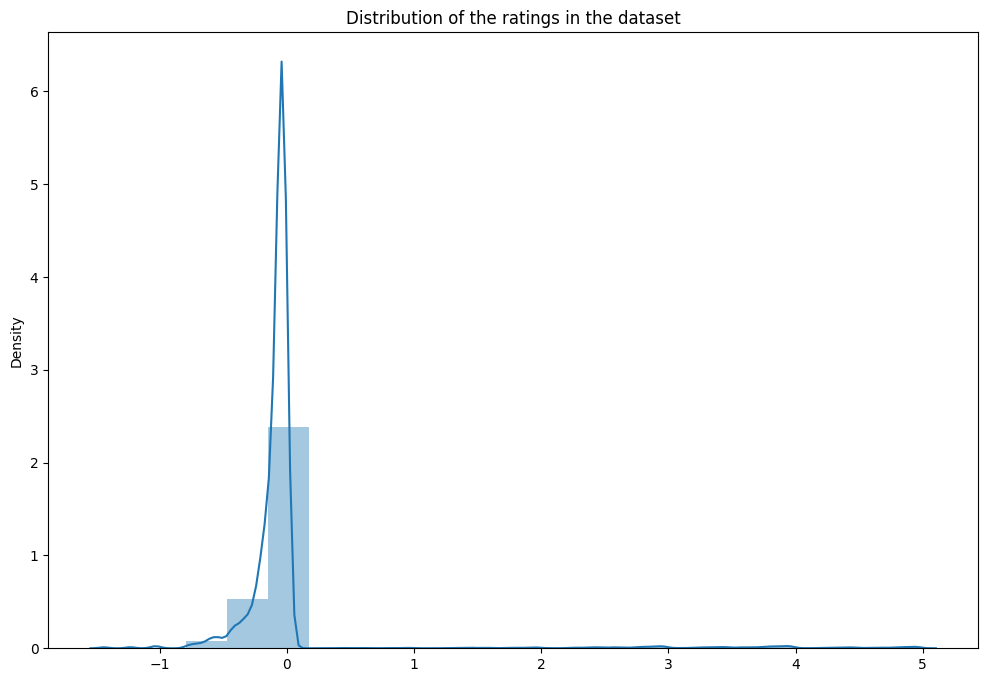

<Axes: xlabel='movieId', ylabel='userId'>

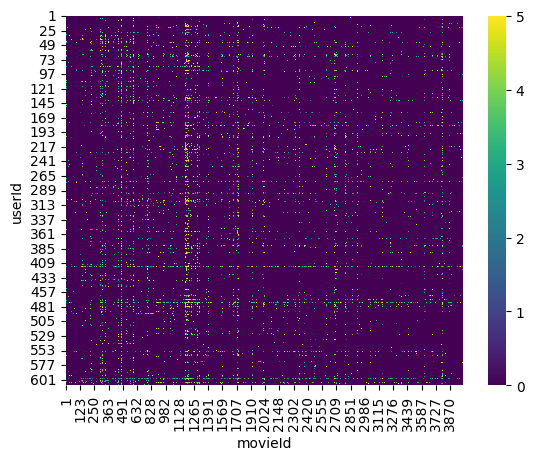

In [8]:
# Plotting some dimensions of the dataset to get a sense of the spread of the Ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.distplot(Ratings_demeaned[Ratings_demeaned != 0].flatten(), bins=20)
plt.title("Distribution of the ratings in the dataset")
plt.show()

sns.heatmap(Ratings, cmap='viridis')

### 3. Implement SVD and PCA logic on your own and find the appropriate k-dimensions

#### Compute SVD

We calculate the SVD of the ratings matrix. The SVD is implemented without using any library. The SVD is calculated using the following steps:

1. Calculate the covariance matrix of the ratings matrix
2. Calculate the eigenvalues and eigenvectors of the covariance matrix
3. Sort the eigenvalues in descending order
4. Select the top k eigenvalues and eigenvectors
5. Calculate the projection matrix
6. Calculate the reduced matrix

In [9]:

# Implement SVD without using any library
def svd(A):
    AT_A = np.dot(A.T, A)

    eigenvalues, eigenvectors = np.linalg.eig(AT_A)

    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    singular_values = np.sqrt(eigenvalues)

    U = np.dot(A, eigenvectors) / singular_values
    V = eigenvectors

    return U, singular_values, V.T

def apply_svd(X, n_components):
    U, S, VT = svd(X)
    reduced_X = np.dot(X, VT.T[:, :n_components])
    #cumulative explained variance
    exp_var = np.cumsum(S**2)/np.sum(S**2)
    return reduced_X, exp_var


To preserve 85% of the variance, we select the top 85% eigenvalues and eigenvectors. The projection matrix is calculated using the top 85% eigenvalues and eigenvectors. The reduced matrix is calculated by multiplying the ratings matrix with the projection matrix.


In [10]:
def calc_k(X, threshold):
    U, S, VT = svd(X)
    exp_var = np.cumsum(S**2)/np.sum(S**2)
    k = np.argmax(exp_var > threshold)
    return k

def plot_k(X, threshold):
    U, S, VT = svd(X)
    exp_var = np.cumsum(S**2)/np.sum(S**2)
    plt.plot(exp_var)
    plt.plot([0, len(exp_var)], [threshold, threshold], 'r--')
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.show()

For this dataset, the threshold of 85% is selected which gives 169 dimensions. The reduced matrix is of shape (610, 169). The reduced matrix is a dense matrix with less number of features.

The error is calculated as the difference between the original matrix and the reconstructed matrix. The error is calculated as 2.1018971503186674e-10 which is very small. This suggests that the reduced matrix is very close to the original matrix.

k =  169


C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


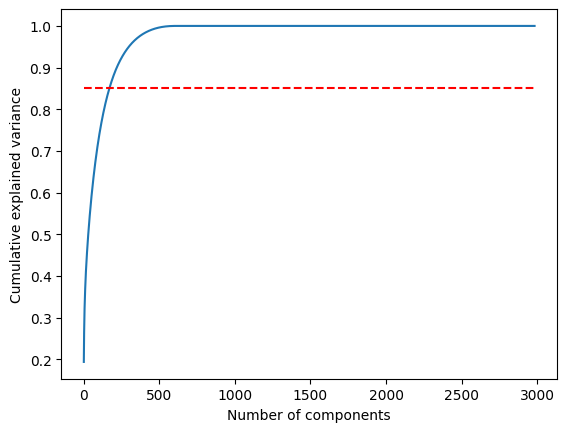

Reduced X shape =  (610, 169)
Error =  1.736891765567612e-10
Total Elements:  103090
Non Zero Elements:  103090
Sparsity: 0.00%


In [11]:
# Apply SVD on the Ratings matrix
threshold = 0.85
k = calc_k(Ratings_demeaned, threshold)
print("k = ", k)
plot_k(Ratings_demeaned, threshold)

# #Use the k value to reduce the dimensionality of the Ratings matrix
reduced_X, exp_var = apply_svd(Ratings_demeaned, k)
print("Reduced X shape = ", reduced_X.shape)

# #Reconstruct the original matrix from the reduced matrix
U, S, VT = svd(Ratings_demeaned)
S = np.diag(S)
reconstructed_X = np.dot(np.dot(U, S), VT)

#Error
error = np.linalg.norm(Ratings_demeaned - reconstructed_X)
print("Error = ", error)

#Sparsity
total_elements = np.prod(reduced_X.shape)
non_zero_elements = np.count_nonzero(reduced_X)
print('Total Elements: ', total_elements)
print('Non Zero Elements: ', non_zero_elements)
sparsity = (total_elements - non_zero_elements) / total_elements * 100
print ('Sparsity: {:4.2f}%'.format(sparsity))


Calculate the PCA of the matrix

The PCA is implemented without using any library. The PCA is calculated using the following steps: 

1. Calculate the covariance matrix of the ratings matrix
2. Calculate the eigenvalues and eigenvectors of the covariance matrix
3. Sort the eigenvalues in descending order
4. Select the top k eigenvalues and eigenvectors
5. Calculate the projection matrix and return it

In [12]:
#pca
def my_pca(x, n_components):
    """
    Perform Principal Component Analysis (PCA) on the input data.

    Parameters:
    x (numpy.ndarray): Input data matrix of shape (n_samples, n_features).
    n_components (int): Number of principal components to retain.

    Returns:
    numpy.ndarray: Transformed data matrix of shape (n_samples, n_components).
    """

    x_mean = np.mean(x, axis=0)
    x = x - x_mean
    cov = np.dot(x.T, x)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors


def apply_pca(x, n_components):
    eigenvalues, eigenvectors = my_pca(x, n_components)
    reduced_x = np.dot(x, eigenvectors[:, :n_components])
    return reduced_x


pca = apply_pca(Ratings_demeaned, k)
print("PCA shape = ", pca.shape)

# Reconstruction Error
eigenvalues, eigenvectors = my_pca(Ratings_demeaned, k)
eigenvectors = eigenvectors[:, :k]
reconstructed_X = np.dot(pca, eigenvectors.T)
error = np.linalg.norm(Ratings_demeaned - reconstructed_X)/100
print("Error = ", error)

PCA shape =  (610, 169)
Error =  3.340089882093381


4. Visualize the data (t-sne plot) after applying SVD and PCA (2)

By looking at the 3 plots below (SVD, PCA and t-SNE), we can see that t-SNE is able to separate the data better than SVD and PCA. The t-SNE plot shows that the data is separated into multiple clusters. 

The SVD and PCA plots show that the data is agreegated in a single large cluster.

C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


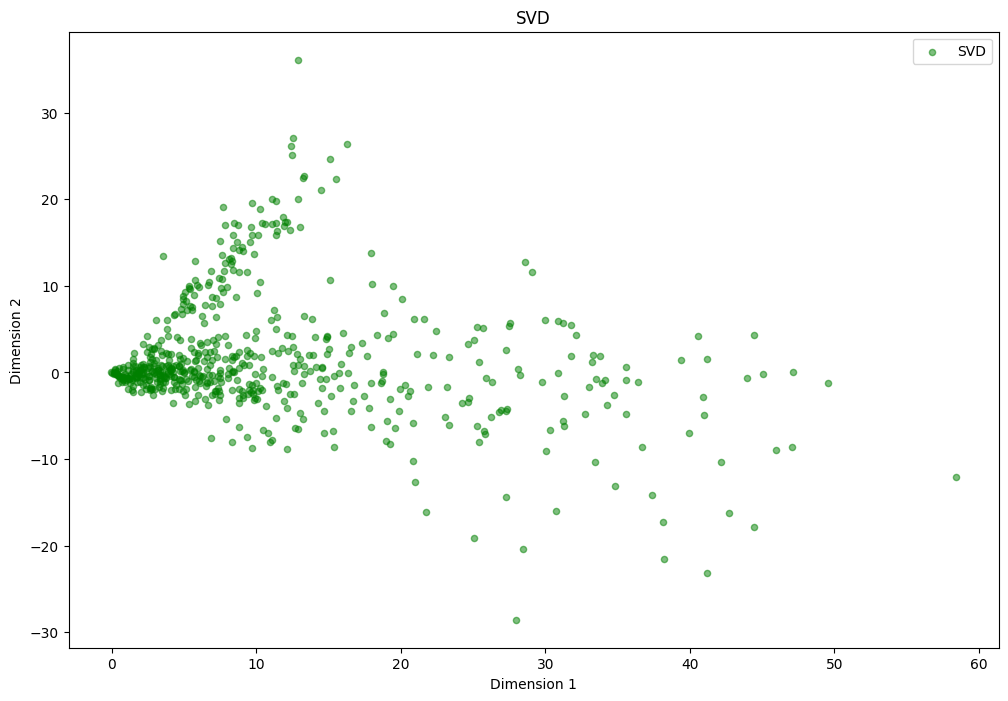

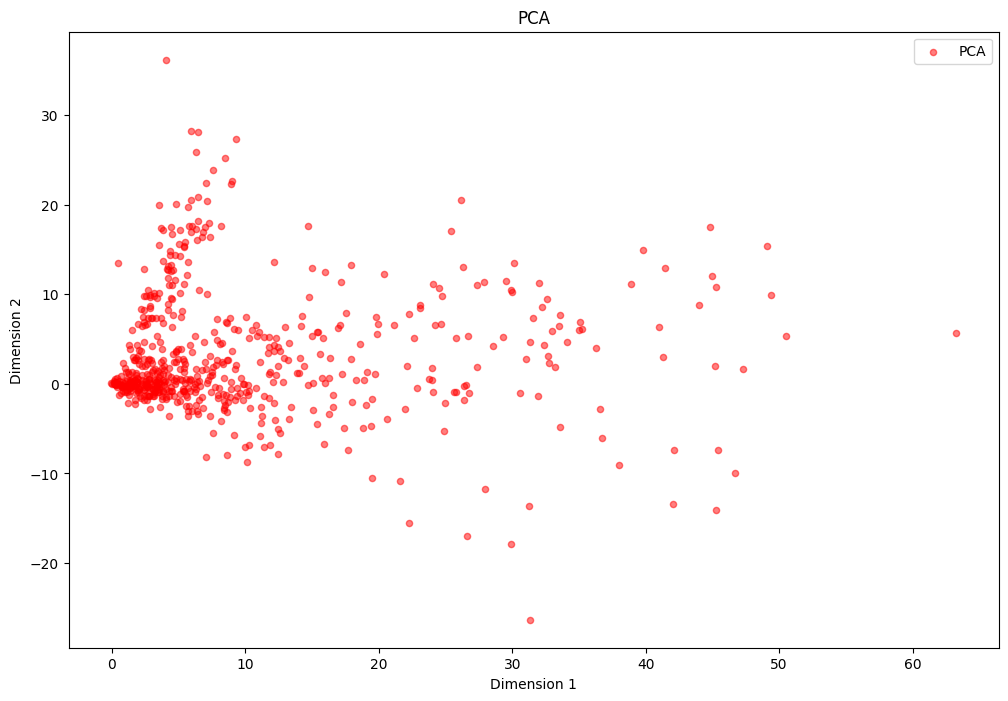

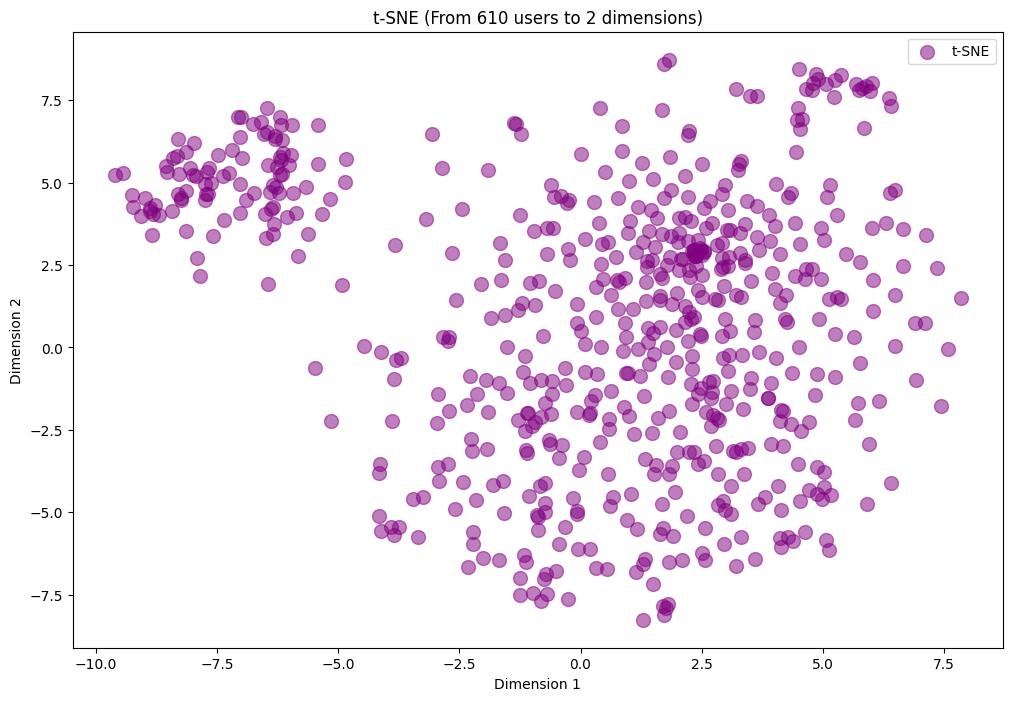

In [13]:
# Visualize the data after applying SVD and PCA (2)
import matplotlib.pyplot as plt

# SVD plot
plt.figure(figsize=(12, 8))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c='green', label='SVD', s=20, alpha=0.5)
plt.title('SVD')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# PCA plot
plt.figure(figsize=(12, 8))
plt.scatter(pca[:, 0], pca[:, 1], c='red', label='PCA', s=20, alpha=0.5)
plt.title('PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# t-SNE plot
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(Ratings_demeaned)
plt.figure(figsize=(12, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='purple', label='t-SNE' , s=100, alpha=0.5)
plt.title('t-SNE (From 610 users to 2 dimensions)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


Applying t-sne on the SVD transformed matrix, we can see that the data is separated into clusters. This shows that applying t-sne on the SVD transformed matrix is able to separate the data into clusters better than raw SVD reduced matrix.

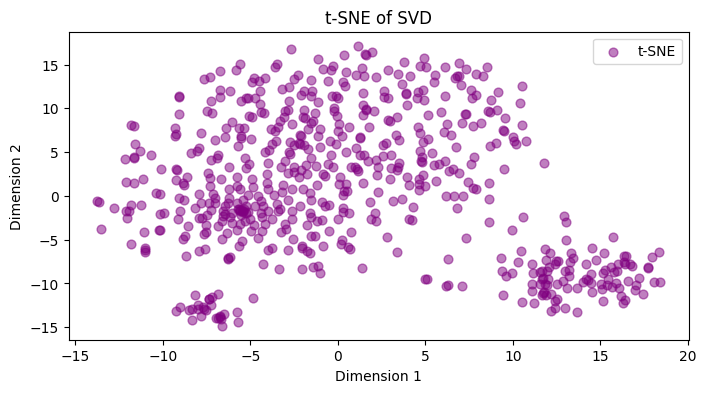

In [14]:
#Visualize the t-snE plot of svd
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(reduced_X.real)
plt.figure(figsize=(8, 4))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1],s=40, c='purple', label='t-SNE', alpha=0.5)
plt.title('t-SNE of SVD')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

Applying t-sne on the PCA transformed data, we can see that the data is separated into clusters. This shows that applying t-sne on the PCA transformed data is able to separate the data into clusters better than raw PCA data. Essentially, we are reducing the dimensionality of the data from 50 to 2 dimensions. This allows us to visualize the data in 2 dimensions.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 610 samples in 0.000s...
[t-SNE] Computed neighbors for 610 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 610 / 610
[t-SNE] Mean sigma: 3.939692
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.622787
[t-SNE] KL divergence after 300 iterations: 1.747527


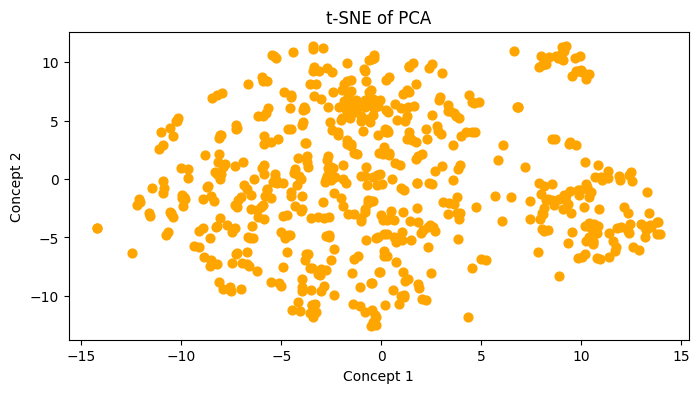

In [15]:
# Visualize the data (t-sne plot) after applying PCA

#convert pca to dataframe
df_pca = pd.DataFrame(pca)

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)

tsne_results = tsne.fit_transform(df_pca.values.real)
plt.figure(figsize=(8,4))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=40, color='orange')
plt.xlabel('Concept 1')
plt.ylabel('Concept 2')
plt.title('t-SNE of PCA')
plt.show()

### Visualising the concepts 

We can plot the concepts of the SVD and PCA. The concepts are the eigenvalues and eigenvectors. The eigenvalues are the variance of the data along the eigenvectors. The eigenvectors are the directions of the data. The eigenvalues are the magnitude of the eigenvectors.

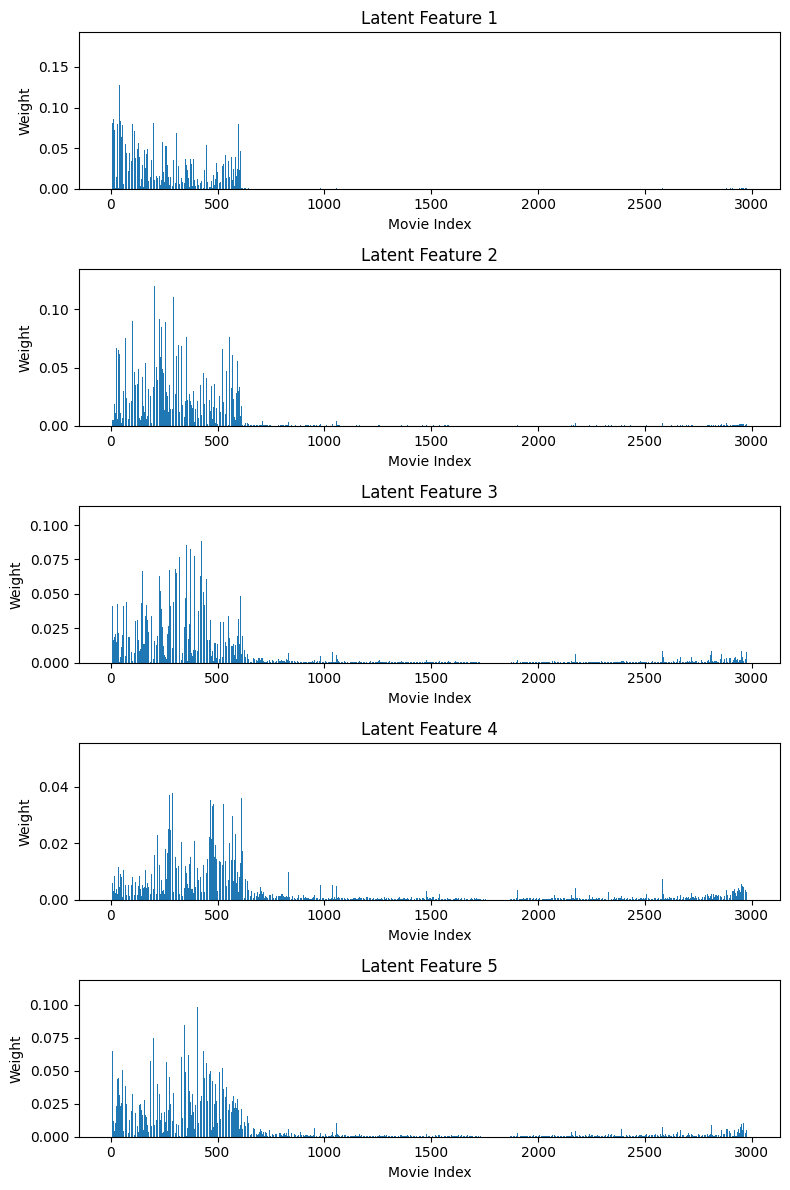

In [16]:
num_latent_features = 5  # Choose the number of latent features to visualize movies
fig, axes = plt.subplots(num_latent_features, 1, figsize=(8, 12))


## mod the values in the Vt
VT = np.abs(VT)

for i in range(num_latent_features):
    axes[i].bar(range(len(VT)), VT[:, i])
    axes[i].set_title(f'Latent Feature {i + 1}')
    axes[i].set_xlabel('Movie Index')
    axes[i].set_ylabel('Weight')

plt.tight_layout()
plt.show()


5. State your conclusions as to how SVD and PCA have helped here. (2)

SVD and PCA are dimensionality reduction techniques. They are used to reduce the number of features in the matrix. This results in a dense matrix with less number of features. This helps in reducing the sparsity of the matrix. This also helps in reducing the computation time as the number of features are reduced. Visualization of the data is also possible as the number of features are reduced.

### Inferences and Results

- The SVD and PCA are able to reduce the dimensionality of the data from 610 to 169. This results in a dense matrix with less number of features capturing 85% of the variance.
- SVD and PCA transform the dataset into a lower-dimensional space, making it more amenable to visualization. The t-Distributed Stochastic Neighbor Embedding (t-SNE) plot generated after applying SVD or PCA provides a visually interpretable representation of the data.
- The 2D plot of SVD and PCA shows that the data is agreegated in a single large cluster. This is due to choosing first 2 components. The reprensetation changes on choosing other components.
- Normalising data before applying SVD and PCA is important. This is because the data is sparse and contains a lot of zeros. Normalising the data helps in reducing the sparsity of the data.


### Results

Overall, we were able to reduce the dimensionality of the data from 2984 to first 169 through dimensionality reduction techniques such as SVD and PCA. This decreased the sparcity of data. We were able to visualize the data in 2 dimensions through t-SNE. We were able to separate the data into clusters through t-SNE. We were able to separate the data into clusters better through t-SNE on SVD and t-SNE on PCA.